# Cats & Dogs Detection

## Project Description
In this classic Machine Learning example, you are given two sets of totally different images. One set is 8,000 images of dogs and another 8,000 images of cats. All these images are in the Folder, Dataset/Training_Set.
Your task is to build a model capable of recognizing if an unknown animal is a cat or a dog.<br>
There is also a Test_Set, containing two Folders each contains 2,000 images of cats and 2,000 dogs. So, you can validate your model accuracy with this test_set. Later, try to use the model to predict if a single unknown image (some examples in the Folder, New_set) is a dog or a cat.<br>

## Importing the Libraries

In [40]:
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing
import matplotlib.pyplot as plt

## Data Preprocessing

### Preprocessing the Training Set

In [41]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Training_Set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7383 images belonging to 2 classes.


##### Adding More Image Augmentations

In [42]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    featurewise_center=True,  # Center pixel values
    featurewise_std_normalization=True,  # Normalize pixel values
    rotation_range=30,  # Rotate up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2,  # Shift height by 20%
    shear_range=0.2,  # Shear transformation
    brightness_range=(0.7, 1.3),  # Adjust brightness
    channel_shift_range=30.0,  # Adjust channel shifts
    fill_mode='nearest',  # Filling mode
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Horizontal flipping
    vertical_flip=True  # Vertical flipping
)

training_set = train_datagen.flow_from_directory(
    directory='Training_Set',
    target_size=(64, 64),  # Adjust to your image size
    batch_size=32,  # Batch size
    class_mode='binary',  # Set the appropriate class mode # Directory to save augmented images (optional)
    save_prefix='aug',  # Prefix for saved images (optional)
    save_format='jpeg'  # Image format for saved images (optional)
)

Found 7383 images belonging to 2 classes.


### Preprocessing the Test Set

In [43]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Test_Set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 863 images belonging to 2 classes.


In [44]:
# in case of n-classes, class_mode ='categorical'

## Building the CNN Model

### Step 1 - Initialising the Model

In [45]:
Model = tf.keras.models.Sequential()

### Step 2 - Adding First Convolution Layer 

In [46]:
Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 3 - Pooling the First Layer

In [47]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 4 - Adding a Second Convolutional Layer

In [48]:
Model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 5 - Pooling the Second Layer

In [49]:
Model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 6 - Flattening

In [50]:
Model.add(tf.keras.layers.Flatten())

### Step 7 - Full Connection

In [51]:
Model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 8 - Output Layer

In [52]:
Model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [53]:
# in case of n-classes: you need to specify n here:
#Model.add(tf.keras.layers.Dense(units=n, activation='softmax'))

### Step 9 - Compiling the CNN

In [54]:
Model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [57]:
# in case of n-classes
#Molel.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Training the CNN and Evaluation

c:\Users\kylea\anaconda3\lib\site-packages\keras\src\legacy\preprocessing\image.py:1263: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
c:\Users\kylea\anaconda3\lib\site-packages\keras\src\legacy\preprocessing\image.py:1273: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.8103 - loss: 0.4094 - val_accuracy: 0.4623 - val_loss: 1.3546
Epoch 2/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8024 - loss: 0.4233 - val_accuracy: 0.4751 - val_loss: 1.3686
Epoch 3/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.8082 - loss: 0.4163 - val_accuracy: 0.5458 - val_loss: 1.0399
Epoch 4/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.8163 - loss: 0.3952 - val_accuracy: 0.4948 - val_loss: 1.3053
Epoch 5/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8133 - loss: 0.4020 - val_accuracy: 0.4728 - val_loss: 1.3772
Epoch 6/200
231/231 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8274 - loss: 0.3826 - val_accuracy: 0.4473 - val_loss: 1.5507


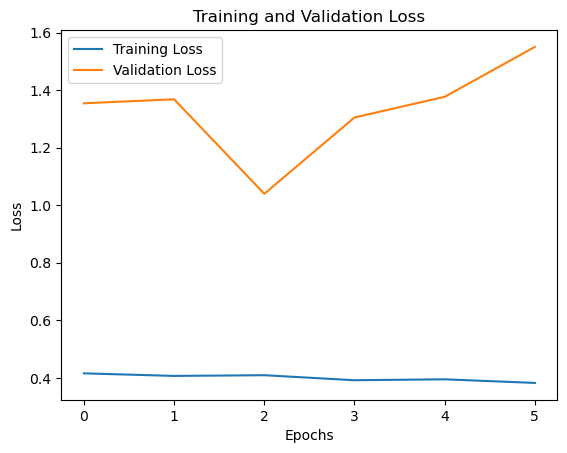

In [58]:
# Model.fit(x = training_set, validation_data = test_set, epochs = 25)
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Fit the model (example usage)
history = Model.fit(x=training_set, validation_data=test_set, epochs=200, callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Check the Accuracy 

In [59]:
accuracy = Model.evaluate(test_set)
print(f"Accuracy: {accuracy[1]*100:.2f}%")

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5088 - loss: 1.1161
Accuracy: 54.58%


###### And, if we want to plot the Accuracy 

In [60]:

import matplotlib.pyplot as plt

#history = Model.fit(training_set, validation_data=test_set, epochs=25)

# Plot training & validation accuracy values

#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
#plt.xlabel('Epoch')
#plt.ylabel('Accuracy')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()

## Making a Prediction

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('InLineProduction_Detection/Part1.jpeg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = Model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'OK'
else:
  prediction = 'Defective'
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
OK
